## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df=pd.read_csv("D:\\Udemy - Python for Time Series Data Analysis\\TSA_COURSE_NOTEBOOKS\Data\\co2_mm_mlo.csv")

In [4]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [5]:
df['Date']=pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [6]:
df=df.set_index('Date')

In [7]:
df.index.freq='MS'

In [8]:
df.head()

,year,month,decimal_date,average,interpolated
Date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


<AxesSubplot:xlabel='Date'>

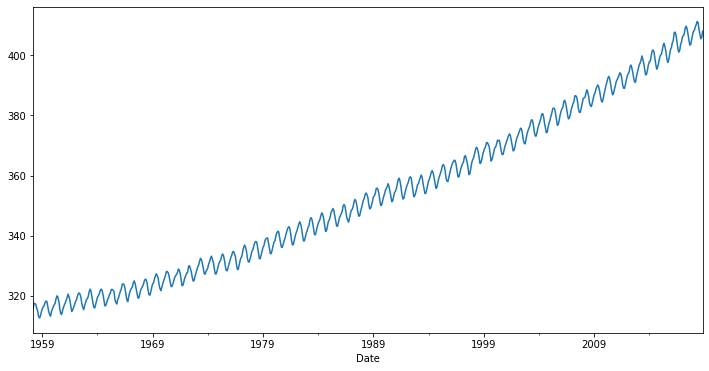

In [9]:
df['interpolated'].plot(figsize=(12,6))

In [10]:
result=seasonal_decompose(df['interpolated'])

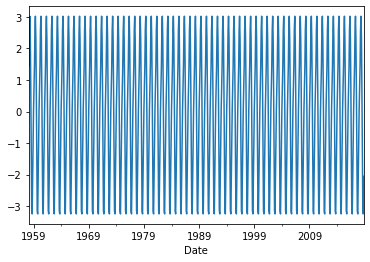

In [11]:
result.seasonal.plot();

In [12]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.265
Date:                            Tue, 01 Dec 2020   AIC                            424.531
Time:                                    00:46:29   BIC                            452.072
Sample:                                         0   HQIC                           435.158
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3527      0.110      3.205      0.001       0.137       0.568
ar.L2          0.0886      0.061      1.453      0.146      -0.031       0.208
ma.L1         -0.7080      0.106     -6.704      0.000      -0.915      -0.501
ar.S.L12       0.9996      0.000   2933.346      0.000       0.999       1.000
ma.S.L12      -0.8660      0.021    -40.638      0.000      -0.908      -0.824
sigma2         0.0957      0.005     20.393      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       43.86   Jarque-Bera (JB):                 4.40
Prob(Q):                              0.31   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
train=df[:243*2]
test=df[243*2:]

In [14]:
model=SARIMAX(train['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))

In [15]:
result=model.fit()

C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  486
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -132.777
Date:                            Tue, 01 Dec 2020   AIC                            277.554
Time:                                    00:55:22   BIC                            302.659
Sample:                                03-01-1958   HQIC                           287.418
                                     - 08-01-1998                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3814      0.105      3.626      0.000       0.175       0.588
ar.L2          0.0933      0.039      2.369      0.018       0.016       0.170
ma.L1         -0.7127      0.096     -7.434      0.000      -0.901      -0.525
ar.S.L12       0.9996      0.000   2402.098      0.000       0.999       1.000
ma.S.L12      -0.8655      0.028    -31.024      0.000      -0.920      -0.811
sigma2         0.0908      0.006     15.523      0.000       0.079       0.102
===================================================================================
Ljung-Box (Q):                       45.58   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.25   Prob(JB):                         0.87
Heteroskedasticity (H):               1.01   Skew:                            -0.03
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
start=len(train)
end=len(train)+len(test)-1

In [30]:
predictions=result.predict(start=start,end=end,typ='levels').rename('SARIMA predictions')

<AxesSubplot:xlabel='Date'>

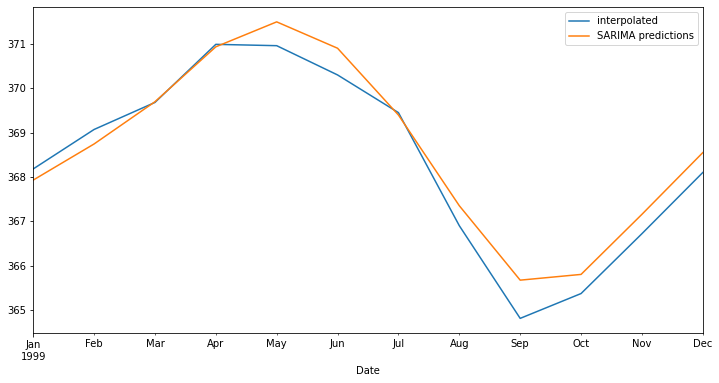

In [31]:
test['interpolated']['1999'].plot(figsize=(12,6),legend=True)
predictions['1999'].plot(figsize=(12,6),legend=True)

In [22]:
 from statsmodels.tools.eval_measures import rmse

In [24]:
rmse(test['interpolated']['1999'],predictions['1999'])

0.4426530006458523

In [25]:
test['interpolated']['1999'].mean()

368.3775

In [26]:
model=SARIMAX(df['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))

In [27]:
res1=model.fit()

C:\Users\HP\anaconda3\envs\myenv\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [28]:
forecast=res1.predict(start=len(df),end=len(df)+12,typ='levels').rename('SARIMA Predictions')

<AxesSubplot:xlabel='Date'>

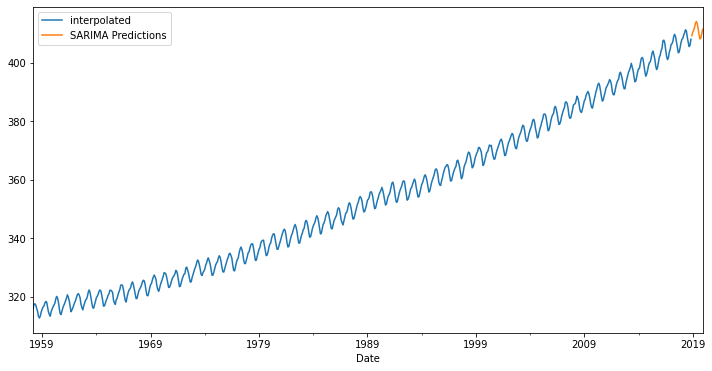

In [29]:
df['interpolated'].plot(legend=True,figsize=(12,6))
forecast.plot(legend=True,figsize=(12,6))